In [9]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
import pylab
fs="\t"

path="/Users/Hp/Desktop/2000_cohort_analysis/"

## Import dataset 

df=pd.read_csv(path + "figure_1B.csv")
df.head() 

,Grade,Gender,Value
0,Grade 0,Male,166
1,Grade 5+3+4,Male,349
2,Grade 0,Female,157
3,Grade 5+3+4,Female,169


In [2]:
# group dataframe columns 
df_new = df.groupby(['Grade', 'Gender'])['Value'].sum().unstack().fillna(0)
df_new

Gender,Female,Male
Grade,,
Grade 0,157,166
Grade 5+3+4,169,349


In [3]:
# Re-ordered dataframe columns in descending order 
cols=df_new.columns.tolist()
cols.sort(reverse=True)
df_new_1=df_new[cols]
df_new_1

Gender,Male,Female
Grade,,
Grade 0,166,157
Grade 5+3+4,349,169


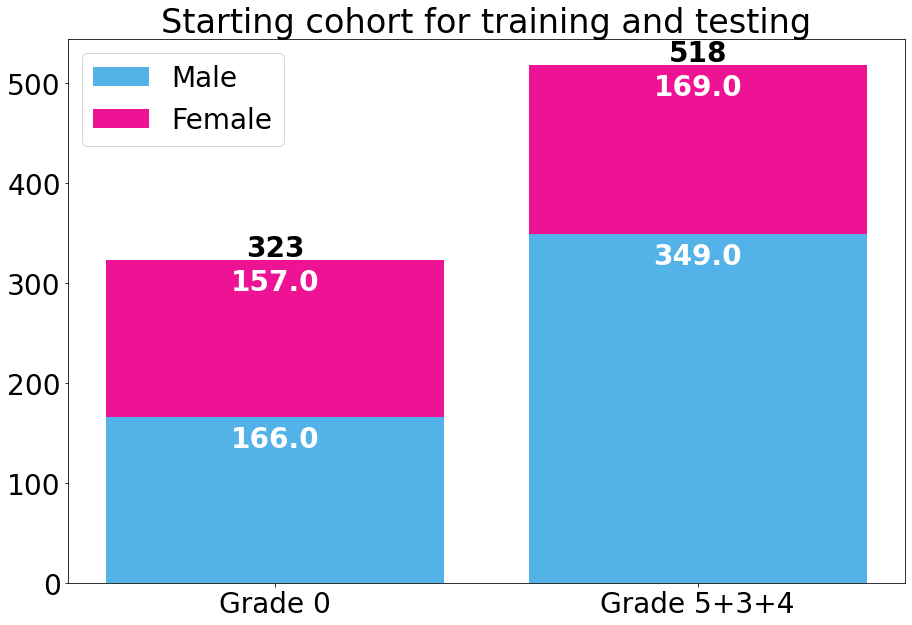

In [4]:
# plot the stacked bar plot chart
pylab.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rc('font', size=28)
fig, ax = plt.subplots()

colors = ['#53B2E8', '#EE1295']
bottom = np.zeros(len(df_new_1))

for i, col in enumerate(df_new_1.columns):
  ax.bar(
      df_new_1.index, df_new_1[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(df_new_1[col])

totals = df_new_1.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# put the annotations inside the bars employing a negative offset.
y_offset = -30
# For each patch add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. 
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=28
  )

ax.set_title('Starting cohort for training and testing')
ax.legend()

# save figure 
ax.figure.savefig(path+"figure_1B.pdf", format="pdf", bbox_inches="tight")


In [5]:
## Import dataset for figure 1C 

df_1=pd.read_csv(path + "data_figure_1C.csv")
df_1.head() 

,Grade,Gender,Value
0,Grade 0,Female,120
1,Grade 5+3+4,Female,156
2,Grade 0,Male,2
3,Grade 5+3+4,Male,340


In [6]:
# group dataframe columns 
df_2 = df_1.groupby(['Grade', 'Gender'])['Value'].sum().unstack().fillna(0)
df_2

Gender,Female,Male
Grade,,
Grade 0,120,2
Grade 5+3+4,156,340


In [7]:
# Re-ordered dataframe columns in descending order 
cols=df_2.columns.tolist()
cols.sort(reverse=True)
df_11=df_2[cols]
df_11

Gender,Male,Female
Grade,,
Grade 0,2,120
Grade 5+3+4,340,156


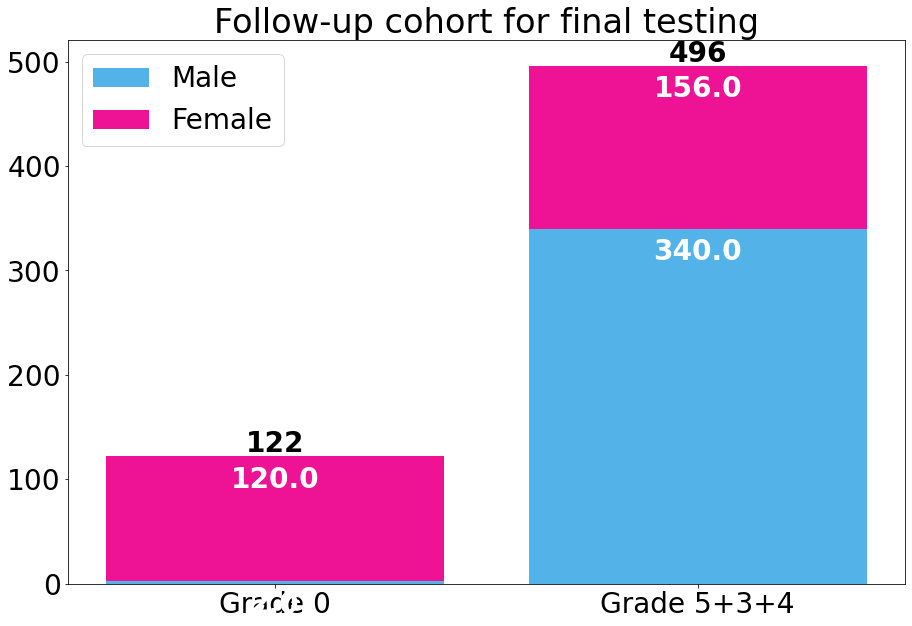

In [8]:
# plot the stacked bar plot chart

fig, ax = plt.subplots()

colors = ['#53B2E8', '#EE1295']
bottom = np.zeros(len(df_11))

for i, col in enumerate(df_11.columns):
  ax.bar(
      df_11.index, df_11[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(df_11[col])

totals = df_11.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# put the annotations inside the bars 
y_offset = -30
# For each patch add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. 
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=28
  )

ax.set_title('Follow-up cohort for final testing')
ax.legend()

# Save figure 
ax.figure.savefig(path+"figure_1C.pdf", format="pdf", bbox_inches="tight")